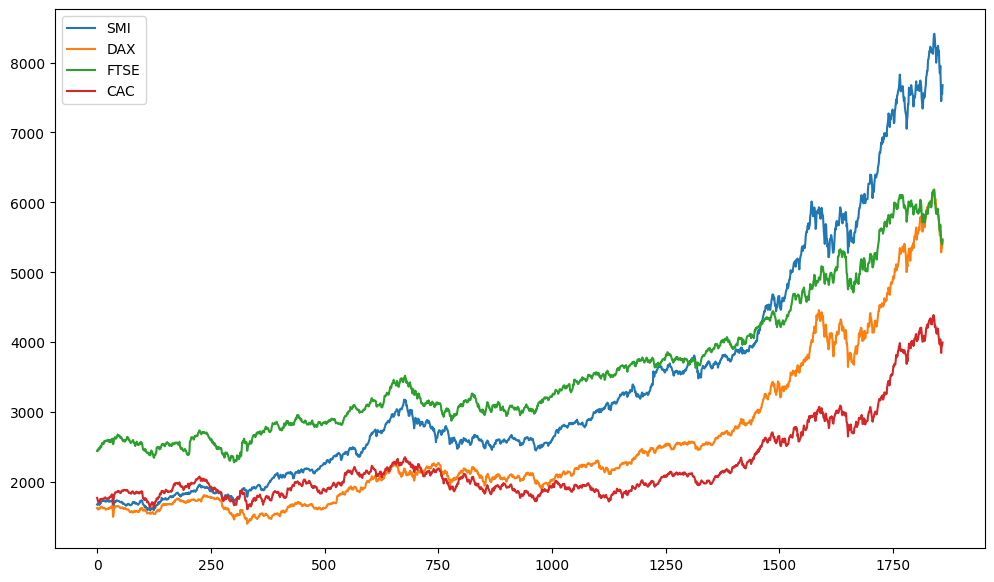

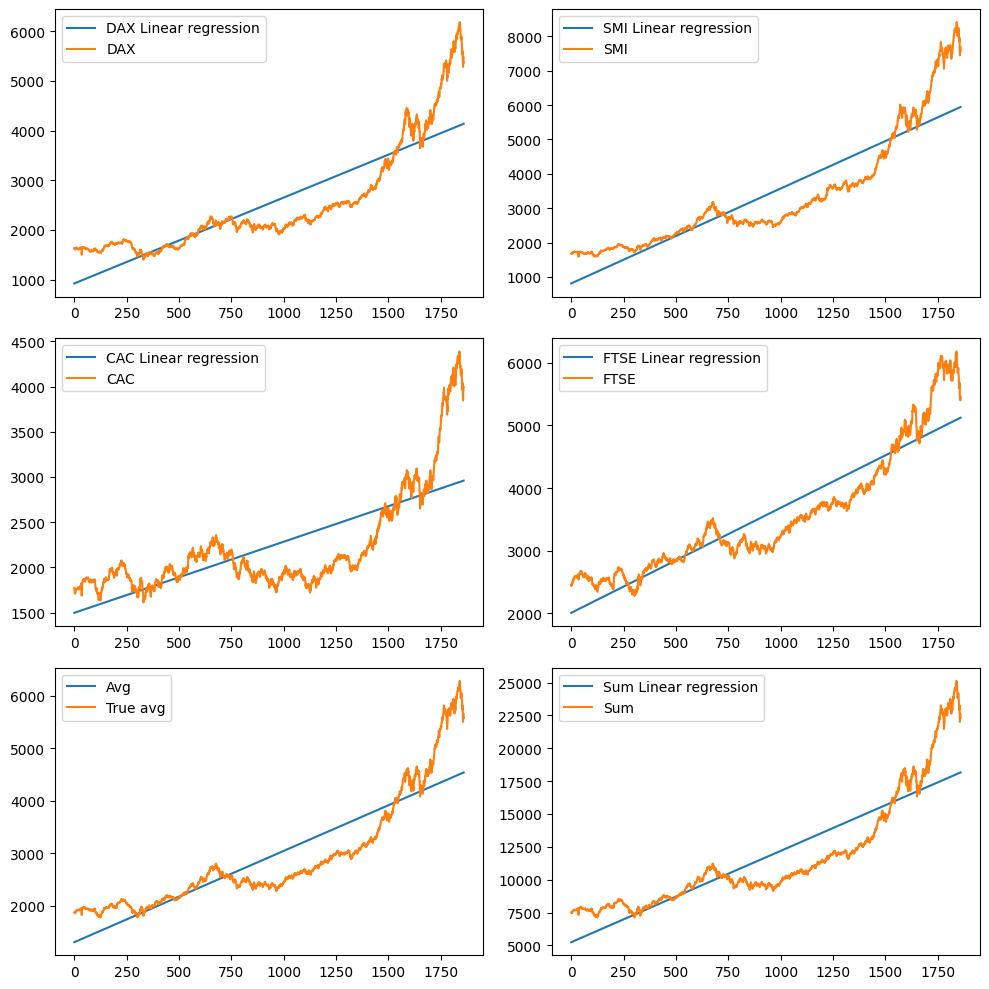

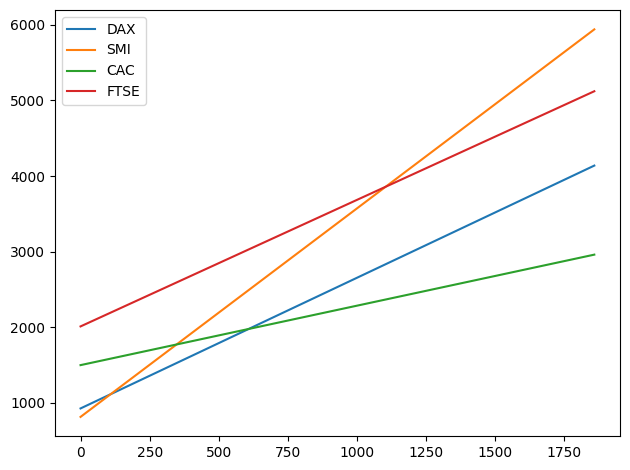

DAX coef: 1.7294322637746682
SMI coef: 2.7597557940917032
CAC coef: 0.7868296563440051
FTSE coef: 1.6748314516108036


In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/eustock.csv')
data.head()

dax = data.DAX
smi = data.SMI
cac = data.CAC
ftse = data.FTSE

sum_data = dax + smi + cac + ftse
avg_data = np.mean([dax, smi, cac, ftse], axis=0)

plt.figure(figsize=(12, 7))
plt.plot(data.index, smi, label='SMI')
plt.plot(data.index, dax, label='DAX')
plt.plot(data.index, ftse, label='FTSE')
plt.plot(data.index, cac, label='CAC')
plt.legend()
plt.show()

linear_1 = LinearRegression()
linear_1.fit(data.index.values.reshape(-1, 1), dax.values.reshape(-1, 1))
linear_2 = LinearRegression()
linear_2.fit(data.index.values.reshape(-1, 1), smi.values.reshape(-1, 1))
linear_3 = LinearRegression()
linear_3.fit(data.index.values.reshape(-1, 1), cac.values.reshape(-1, 1))
linear_4 = LinearRegression()
linear_4.fit(data.index.values.reshape(-1, 1), ftse.values.reshape(-1, 1))
linear_avg = LinearRegression()
linear_avg.fit(data.index.values.reshape(-1, 1), avg_data.reshape(-1, 1))
linear_sum = LinearRegression()
linear_sum.fit(data.index.values.reshape(-1, 1), sum_data.values.reshape(-1, 1))

plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
plt.plot(data.index, linear_1.predict(data.index.values.reshape(-1, 1)), label='DAX Linear regression')
plt.plot(data.index, dax, label='DAX')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(data.index, linear_2.predict(data.index.values.reshape(-1, 1)), label='SMI Linear regression')
plt.plot(data.index, smi, label='SMI')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(data.index, linear_3.predict(data.index.values.reshape(-1, 1)), label='CAC Linear regression')
plt.plot(data.index, cac, label='CAC')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(data.index, linear_4.predict(data.index.values.reshape(-1, 1)), label='FTSE Linear regression')
plt.plot(data.index, ftse, label='FTSE')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(data.index, linear_avg.predict(data.index.values.reshape(-1, 1)), label='Avg')
plt.plot(data.index, avg_data, label='True avg')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(data.index, linear_sum.predict(data.index.values.reshape(-1, 1)), label='Sum Linear regression')
plt.plot(data.index, sum_data, label='Sum')
plt.legend()

plt.tight_layout()
plt.show()

plt.plot(data.index, linear_1.predict(data.index.values.reshape(-1, 1)), label='DAX')
plt.plot(data.index, linear_2.predict(data.index.values.reshape(-1, 1)), label='SMI')
plt.plot(data.index, linear_3.predict(data.index.values.reshape(-1, 1)), label='CAC')
plt.plot(data.index, linear_4.predict(data.index.values.reshape(-1, 1)), label='FTSE')
plt.legend()
plt.tight_layout()
plt.show()

print('DAX coef:', linear_1.coef_[0][0])
print('SMI coef:', linear_2.coef_[0][0])
print('CAC coef:', linear_3.coef_[0][0])
print('FTSE coef:', linear_4.coef_[0][0])